## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras
from keras import optimizers

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
def build_mlp():
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    #x = keras.layers.Dense(units=256, activation="relu")(x)
    #x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
model = build_mlp()

W0811 16:21:36.305100 10520 deprecation_wrapper.py:119] From C:\Users\Francis\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0811 16:21:36.420100 10520 deprecation_wrapper.py:119] From C:\Users\Francis\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0811 16:21:36.451300 10520 deprecation_wrapper.py:119] From C:\Users\Francis\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [5]:
model.summary()

optimizer = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 1,578,506
Trainable params: 1,578,506
Non-trainable params: 0
_________________________________________________________________


W0811 16:21:38.874800 10520 deprecation_wrapper.py:119] From C:\Users\Francis\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0811 16:21:38.984800 10520 deprecation_wrapper.py:119] From C:\Users\Francis\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [6]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

W0811 16:21:58.553900 10520 deprecation.py:323] From C:\Users\Francis\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0811 16:21:58.643200 10520 deprecation_wrapper.py:119] From C:\Users\Francis\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 8s 153us/step - loss: 1.8461 - acc: 0.3471 - val_loss: 1.7261 - val_acc: 0.3878
Epoch 2/500
50000/50000 [==============================] - 7s 145us/step - loss: 1.6572 - acc: 0.4212 - val_loss: 1.6549 - val_acc: 0.4106
Epoch 3/500
50000/50000 [==============================] - 7s 145us/step - loss: 1.5757 - acc: 0.4485 - val_loss: 1.6039 - val_acc: 0.4290
Epoch 4/500
50000/50000 [==============================] - 9s 175us/step - loss: 1.5190 - acc: 0.4712 - val_loss: 1.5486 - val_acc: 0.4533
Epoch 5/500
50000/50000 [==============================] - 10s 199us/step - loss: 1.4734 - acc: 0.4856 - val_loss: 1.5129 - val_acc: 0.4645
Epoch 6/500
50000/50000 [==============================] - 9s 183us/step - loss: 1.4351 - acc: 0.5025 - val_loss: 1.5454 - val_acc: 0.4397
Epoch 7/500
50000/50000 [==============================] - 11s 212us/step - loss: 1.4029 - acc: 0.5130 - val_loss: 

50000/50000 [==============================] - 7s 146us/step - loss: 0.7007 - acc: 0.7617 - val_loss: 1.5655 - val_acc: 0.5269
Epoch 60/500
50000/50000 [==============================] - 7s 144us/step - loss: 0.6930 - acc: 0.7633 - val_loss: 1.6177 - val_acc: 0.5187
Epoch 61/500
50000/50000 [==============================] - 7s 142us/step - loss: 0.6821 - acc: 0.7646 - val_loss: 1.7275 - val_acc: 0.4830
Epoch 62/500
50000/50000 [==============================] - 7s 143us/step - loss: 0.6739 - acc: 0.7709 - val_loss: 1.5507 - val_acc: 0.5303
Epoch 63/500
50000/50000 [==============================] - 7s 140us/step - loss: 0.6577 - acc: 0.7731 - val_loss: 1.7930 - val_acc: 0.4782
Epoch 64/500
50000/50000 [==============================] - 8s 158us/step - loss: 0.6500 - acc: 0.7785 - val_loss: 1.7447 - val_acc: 0.4943
Epoch 65/500
50000/50000 [==============================] - 7s 146us/step - loss: 0.6420 - acc: 0.7805 - val_loss: 1.6283 - val_acc: 0.5187
Epoch 66/500
50000/50000 [=======

50000/50000 [==============================] - 8s 161us/step - loss: 0.2716 - acc: 0.9168 - val_loss: 2.3458 - val_acc: 0.4955
Epoch 118/500
50000/50000 [==============================] - 8s 160us/step - loss: 0.3013 - acc: 0.9049 - val_loss: 2.4131 - val_acc: 0.4691
Epoch 119/500
50000/50000 [==============================] - 8s 160us/step - loss: 0.2673 - acc: 0.9190 - val_loss: 2.1129 - val_acc: 0.5187
Epoch 120/500
50000/50000 [==============================] - 7s 143us/step - loss: 0.2579 - acc: 0.9234 - val_loss: 2.1670 - val_acc: 0.5126
Epoch 121/500
50000/50000 [==============================] - 7s 143us/step - loss: 0.2462 - acc: 0.9278 - val_loss: 2.1258 - val_acc: 0.5183
Epoch 122/500
50000/50000 [==============================] - 7s 146us/step - loss: 0.2436 - acc: 0.9278 - val_loss: 2.0995 - val_acc: 0.5201
Epoch 123/500
50000/50000 [==============================] - 7s 136us/step - loss: 0.2382 - acc: 0.9299 - val_loss: 2.3395 - val_acc: 0.4978
Epoch 124/500
50000/50000 [

50000/50000 [==============================] - 8s 165us/step - loss: 0.0780 - acc: 0.9861 - val_loss: 2.4634 - val_acc: 0.5205
Epoch 176/500
50000/50000 [==============================] - 8s 166us/step - loss: 0.0742 - acc: 0.9876 - val_loss: 2.4945 - val_acc: 0.5284
Epoch 177/500
50000/50000 [==============================] - 7s 149us/step - loss: 0.0695 - acc: 0.9895 - val_loss: 2.6006 - val_acc: 0.5114
Epoch 178/500
50000/50000 [==============================] - 7s 136us/step - loss: 0.0722 - acc: 0.9880 - val_loss: 2.5082 - val_acc: 0.5296
Epoch 179/500
50000/50000 [==============================] - 7s 134us/step - loss: 0.0678 - acc: 0.9893 - val_loss: 2.5648 - val_acc: 0.5204
Epoch 180/500
50000/50000 [==============================] - 7s 134us/step - loss: 0.0706 - acc: 0.9880 - val_loss: 2.5852 - val_acc: 0.5257
Epoch 181/500
50000/50000 [==============================] - 7s 134us/step - loss: 0.0659 - acc: 0.9903 - val_loss: 2.5991 - val_acc: 0.5169
Epoch 182/500
50000/50000 [

50000/50000 [==============================] - 8s 162us/step - loss: 0.0241 - acc: 0.9988 - val_loss: 2.7496 - val_acc: 0.5306
Epoch 234/500
50000/50000 [==============================] - 8s 152us/step - loss: 0.0248 - acc: 0.9984 - val_loss: 2.7734 - val_acc: 0.5309
Epoch 235/500
50000/50000 [==============================] - 8s 150us/step - loss: 0.0232 - acc: 0.9987 - val_loss: 2.7854 - val_acc: 0.5232
Epoch 236/500
50000/50000 [==============================] - 8s 160us/step - loss: 0.0231 - acc: 0.9987 - val_loss: 2.7604 - val_acc: 0.5306
Epoch 237/500
50000/50000 [==============================] - 9s 179us/step - loss: 0.0234 - acc: 0.9987 - val_loss: 2.7852 - val_acc: 0.5251
Epoch 238/500
50000/50000 [==============================] - 8s 168us/step - loss: 0.0222 - acc: 0.9989 - val_loss: 2.7720 - val_acc: 0.5345
Epoch 239/500
50000/50000 [==============================] - 9s 190us/step - loss: 0.0218 - acc: 0.9990 - val_loss: 2.7950 - val_acc: 0.5279
Epoch 240/500
50000/50000 [

50000/50000 [==============================] - 7s 148us/step - loss: 0.0122 - acc: 0.9997 - val_loss: 2.9253 - val_acc: 0.5293
Epoch 292/500
50000/50000 [==============================] - 7s 142us/step - loss: 0.0118 - acc: 0.9998 - val_loss: 2.9204 - val_acc: 0.5309
Epoch 293/500
50000/50000 [==============================] - 7s 147us/step - loss: 0.0119 - acc: 0.9998 - val_loss: 2.9233 - val_acc: 0.5313
Epoch 294/500
50000/50000 [==============================] - 8s 152us/step - loss: 0.0117 - acc: 0.9998 - val_loss: 2.9242 - val_acc: 0.5315
Epoch 295/500
50000/50000 [==============================] - 7s 140us/step - loss: 0.0117 - acc: 0.9998 - val_loss: 2.9251 - val_acc: 0.5311
Epoch 296/500
50000/50000 [==============================] - 7s 137us/step - loss: 0.0117 - acc: 0.9998 - val_loss: 2.9281 - val_acc: 0.5298
Epoch 297/500
50000/50000 [==============================] - 7s 144us/step - loss: 0.0116 - acc: 0.9997 - val_loss: 2.9338 - val_acc: 0.5291
Epoch 298/500
50000/50000 [

50000/50000 [==============================] - 7s 145us/step - loss: 0.0079 - acc: 1.0000 - val_loss: 3.0365 - val_acc: 0.5263
Epoch 350/500
50000/50000 [==============================] - 7s 143us/step - loss: 0.0078 - acc: 1.0000 - val_loss: 3.0292 - val_acc: 0.5293
Epoch 351/500
50000/50000 [==============================] - 7s 143us/step - loss: 0.0077 - acc: 1.0000 - val_loss: 3.0277 - val_acc: 0.5348
Epoch 352/500
50000/50000 [==============================] - 7s 148us/step - loss: 0.0077 - acc: 1.0000 - val_loss: 3.0459 - val_acc: 0.5283
Epoch 353/500
50000/50000 [==============================] - 7s 145us/step - loss: 0.0077 - acc: 1.0000 - val_loss: 3.0315 - val_acc: 0.5321
Epoch 354/500
50000/50000 [==============================] - 7s 143us/step - loss: 0.0076 - acc: 0.9999 - val_loss: 3.0353 - val_acc: 0.5320
Epoch 355/500
50000/50000 [==============================] - 7s 143us/step - loss: 0.0076 - acc: 1.0000 - val_loss: 3.0367 - val_acc: 0.5331
Epoch 356/500
50000/50000 [

50000/50000 [==============================] - 21s 425us/step - loss: 0.0057 - acc: 1.0000 - val_loss: 3.1167 - val_acc: 0.5311
Epoch 407/500
50000/50000 [==============================] - 19s 386us/step - loss: 0.0057 - acc: 1.0000 - val_loss: 3.1116 - val_acc: 0.5307
Epoch 408/500
50000/50000 [==============================] - 19s 387us/step - loss: 0.0057 - acc: 1.0000 - val_loss: 3.1127 - val_acc: 0.5308
Epoch 409/500
50000/50000 [==============================] - 19s 377us/step - loss: 0.0056 - acc: 1.0000 - val_loss: 3.1139 - val_acc: 0.5316
Epoch 410/500
50000/50000 [==============================] - 19s 375us/step - loss: 0.0056 - acc: 1.0000 - val_loss: 3.1153 - val_acc: 0.5320
Epoch 411/500
50000/50000 [==============================] - 20s 405us/step - loss: 0.0056 - acc: 1.0000 - val_loss: 3.1147 - val_acc: 0.5296
Epoch 412/500
50000/50000 [==============================] - 20s 399us/step - loss: 0.0056 - acc: 1.0000 - val_loss: 3.1160 - val_acc: 0.5324
Epoch 413/500
50000/

50000/50000 [==============================] - 7s 149us/step - loss: 0.0045 - acc: 1.0000 - val_loss: 3.1774 - val_acc: 0.5304
Epoch 464/500
50000/50000 [==============================] - 8s 154us/step - loss: 0.0045 - acc: 1.0000 - val_loss: 3.1747 - val_acc: 0.5298
Epoch 465/500
50000/50000 [==============================] - 7s 143us/step - loss: 0.0045 - acc: 1.0000 - val_loss: 3.1786 - val_acc: 0.5316
Epoch 466/500
50000/50000 [==============================] - 7s 140us/step - loss: 0.0045 - acc: 1.0000 - val_loss: 3.1744 - val_acc: 0.5305
Epoch 467/500
50000/50000 [==============================] - 10s 195us/step - loss: 0.0044 - acc: 1.0000 - val_loss: 3.1773 - val_acc: 0.5316
Epoch 468/500
50000/50000 [==============================] - 9s 189us/step - loss: 0.0044 - acc: 1.0000 - val_loss: 3.1786 - val_acc: 0.5312
Epoch 469/500
50000/50000 [==============================] - 8s 160us/step - loss: 0.0044 - acc: 1.0000 - val_loss: 3.1834 - val_acc: 0.5301
Epoch 470/500
50000/50000 

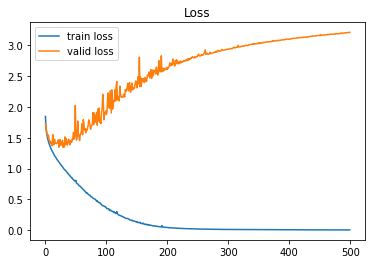

In [9]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

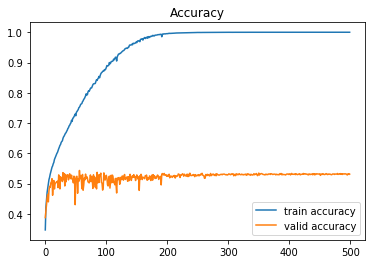

In [10]:
plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()